Zadanie 1:
Wyznacz wielomiany interpolujące funkcje:

f1(x) = 1 / (1 + 25x^2) na przedziale [−1,1],
f2(x) = exp(cos(x)) na przedziale [0, 2pi],

używając:
- wielomianów Lagrange'a z równoodległymi węzłami xj = x0 + jh, j = 0, 1, ..., n gdzie h = (xn - x0)/n
- kubicznych funkcji sklejanych z równoodległymi węzłami xj = x0 + jh, j = 0, 1, ..., n gdzie h = (xn - x0)/n
- wielomianów Lagrange'a z węzłami Czebyszewa
  xj = cos(Oj) Oj = (2*j + 1)/2*(n+1) * pi, 0 <= j <= n .

(A) Dla funkcji Rungego, f1(x), z n = 12 węzłami interpolacji przedstaw na wspólnym wykresie funkcję f1(x) oraz wyznaczone wielomiany interpolacyjne i funkcję sklejaną. W celu stworzenia wykresu wykonaj próbkowanie funkcji f1(x) i wielomianów interpolacyjnych na 10 razy gęstszym zbiorze (próbkowanie jednostajne w x dla węzłów równoodległych, jednostajne w θ dla węzłów Czebyszewa). Pamiętaj o podpisaniu wykresu i osi oraz o legendzie.

(B) Wykonaj interpolację funkcji f1(x) i f2(x) z n = 4,5,...,50 węzłami interpolacji, używając każdej z powyższych trzech metod interpolacji. Ewaluację funkcji, wielomianów interpolacyjnych oraz funkcji sklejanych przeprowadź na zbiorze 500 losowo wybranych punktów z dziedziny funkcji. Stwórz dwa rysunki, jeden dla f1(x), drugi dla f2(x). Na każdym rysunku przedstaw razem wykresy normy wektora błędów (czyli długości wektora) na tym zbiorze punktów w zależności od liczby węzłów interpolacji, n, dla każdej z trzech metod interpolacji. Która metoda interpolacji jest najbardziej dokładna, a która najmniej?

Uwaga 1. Transformacja węzłów Czebyszewar ∈ [−1,1] na punkty x ∈ [a,b] dana jest wzorem x = a + (b−a)∗(r+ 1)/2.

Uwaga 2. Interpolację funkcjami sklejanymi można zaimplementować funkcją scipy.interpolate.interp1d .Zaimplementuj własnoręcznie interpolację 
Lagrange’a. Interpolacja Lagrange’a, w tym implementacja biblioteczna scipy.interpolate.lagrange jest niestablina numerycznie.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.interpolate import interp1d
from numpy.linalg import norm
#import sys
#!{sys.executable} -m pip install scipy

In [3]:
# Functions

# f1:
def f1(x):
    return 1/(1+25*(x**2))

def f2(x):
    return m.exp(m.cos(x))

In [4]:
# Data:
n = 12

def do_interpolation(f, start, target, n):
    h = (target - start)/n
    nodes = [start + j*h for j in range(n+1)]
    nodesC = [start + (target-start) * (1 + m.cos((2*j + 1)*m.pi/(2*(n+1))) ) / 2 for j in range(n+1)]
    y_values = [f(x) for x in nodes]

    return nodes, nodesC, y_values


nodes3 = [m.cos((2*j + 1) * m.pi/(2*(n + 1))) for j in range(n+1)]

In [5]:
def lagrange_interpolation(x, x_values, y_values):
    n = len(x_values)
    result = 0
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    return result

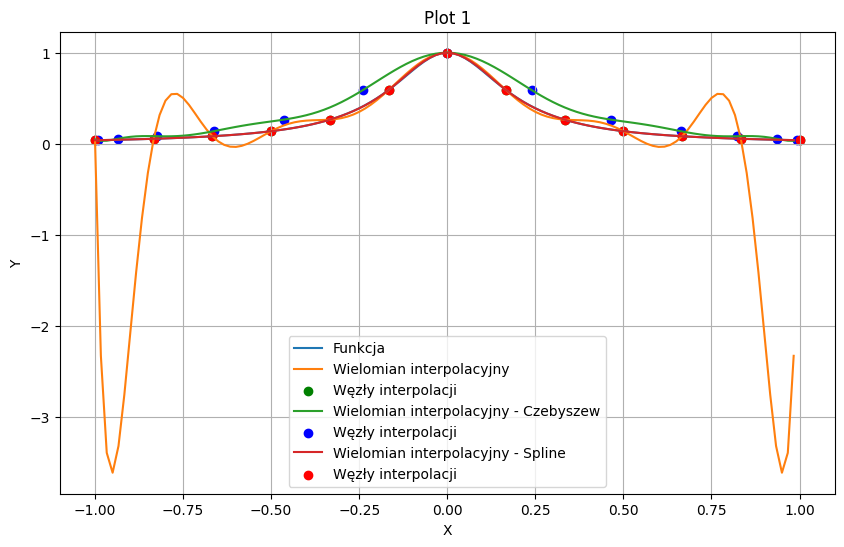

In [6]:
start_1 = -1
target_1 = 1
n_1 = 12

nodes1, nodes1C, y1_values = do_interpolation(f1, start_1, target_1, n_1)

h1 = (target_1 - start_1)/n_1

data = [start_1 + j*h1/10 for j in range(10*(n))]

y1 = [f1(x) for x in data]

data1 = [start_1 + j*h1/10 for j in range(10*(n))]

interp1 = [lagrange_interpolation(_, nodes1, y1_values) for _ in data1]

data1C = [m.cos((2*j + 1)*m.pi/(2*(n+1))) for j in range(n+1)]

interp1C = [lagrange_interpolation(_, nodes1C, y1_values) for _ in data1]

spline = interp1d(nodes1, y1_values, kind='cubic')
interp1S = spline(data)

plt.figure(figsize=(10, 6))

plt.plot(data, y1, label='Funkcja')

plt.plot(data1, interp1, label='Wielomian interpolacyjny')
plt.scatter(nodes1, y1_values, color='green', label='Węzły interpolacji')

plt.plot(data1, interp1C, label='Wielomian interpolacyjny - Czebyszew')
plt.scatter(nodes1C, y1_values, color='blue', label='Węzły interpolacji')

plt.plot(data1, interp1S, label='Wielomian interpolacyjny - Spline')
plt.scatter(nodes1, y1_values, color='red', label='Węzły interpolacji')

plt.title('Plot 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

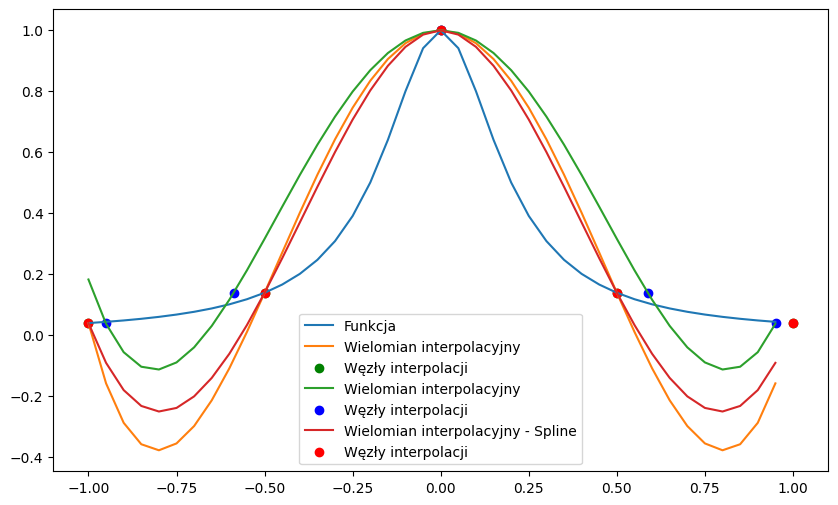

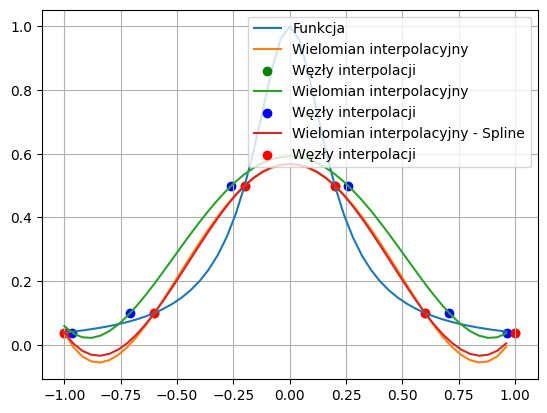

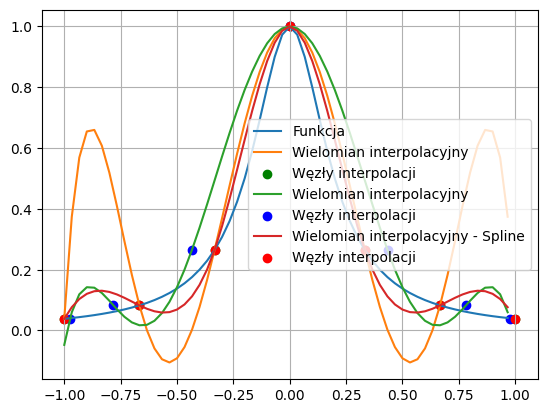

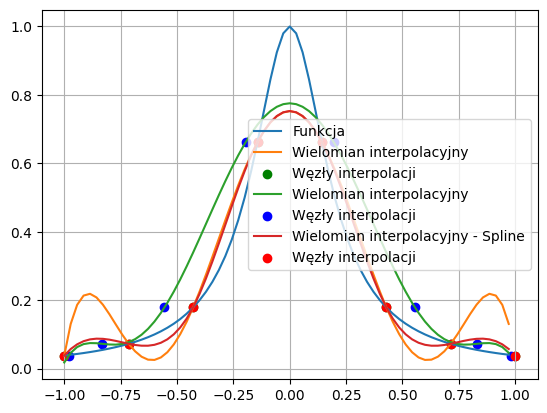

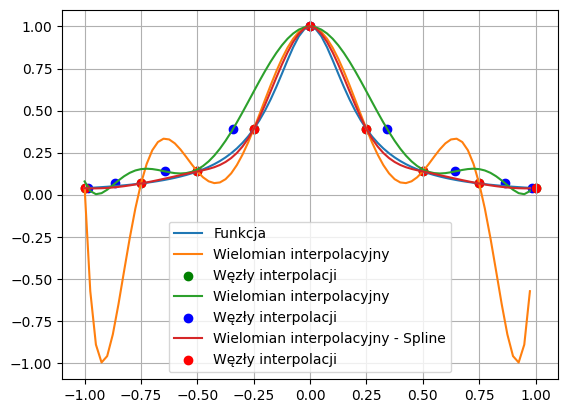

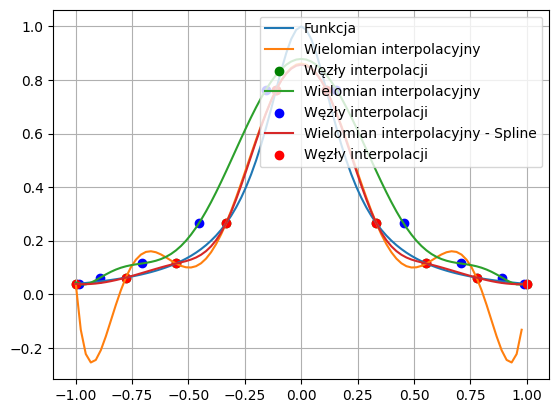

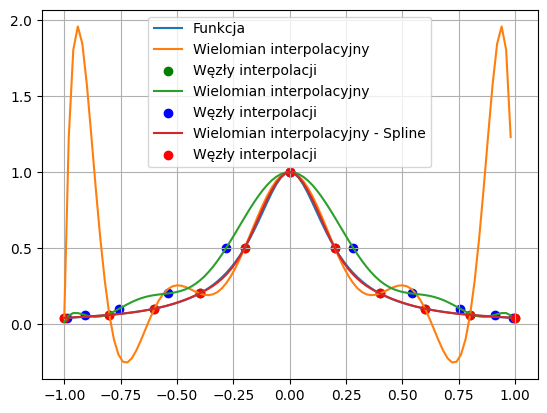

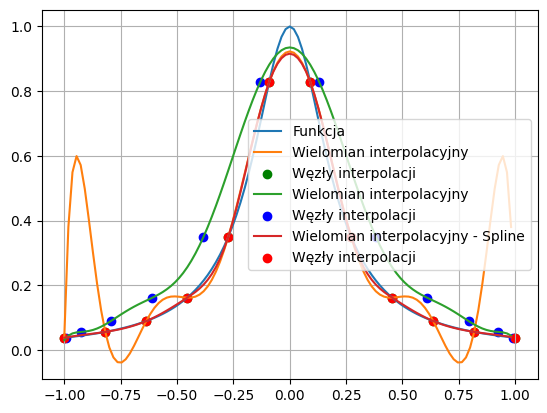

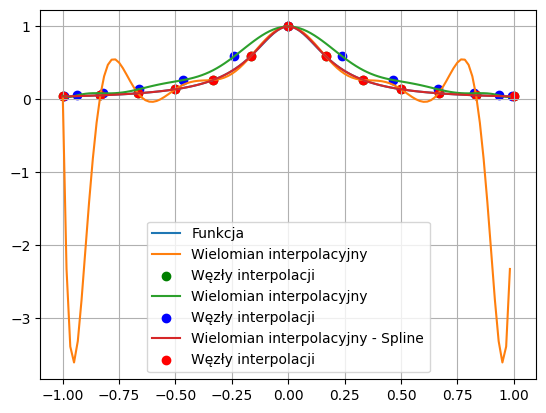

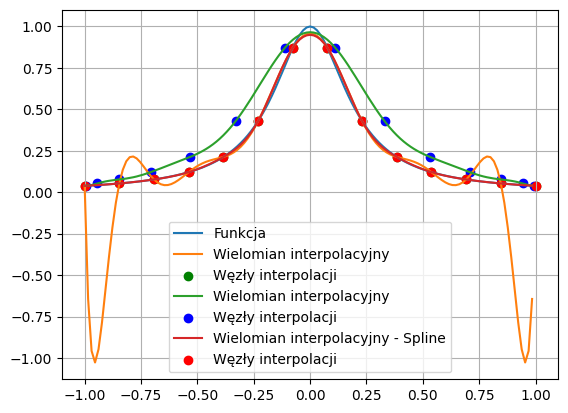

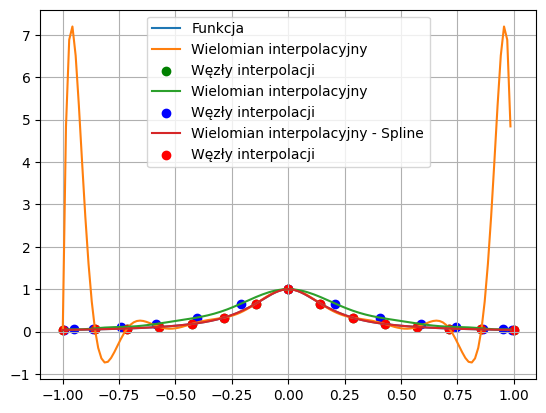

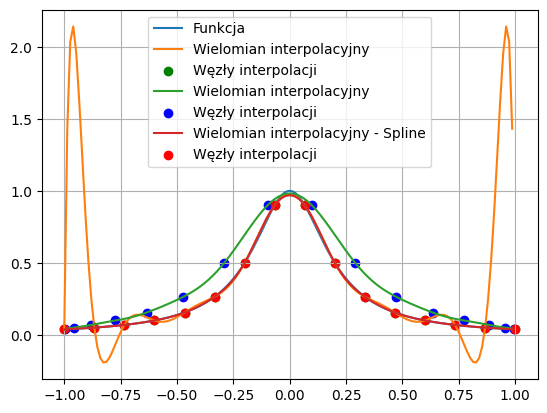

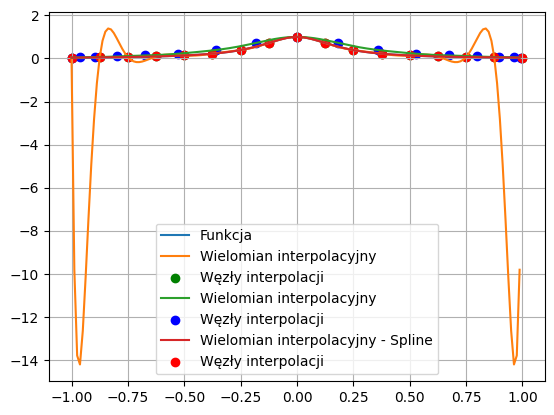

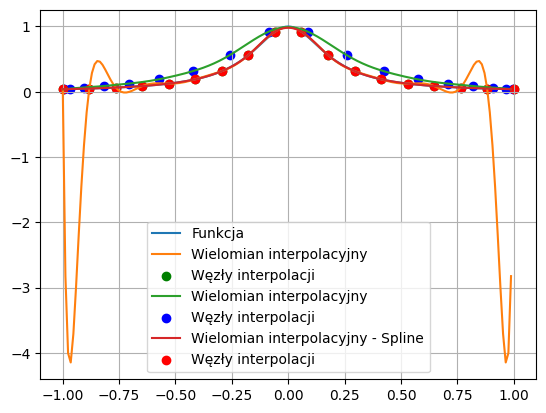

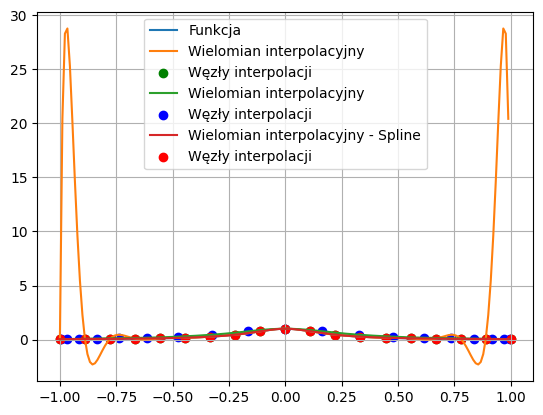

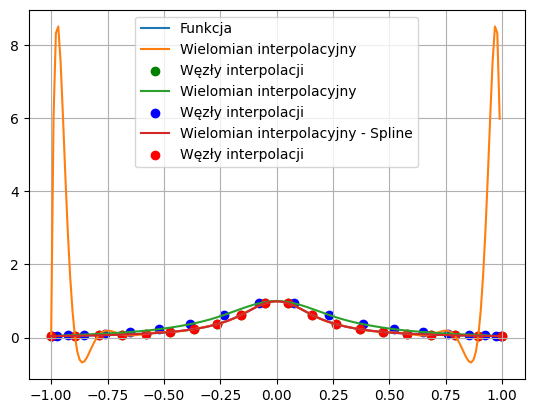

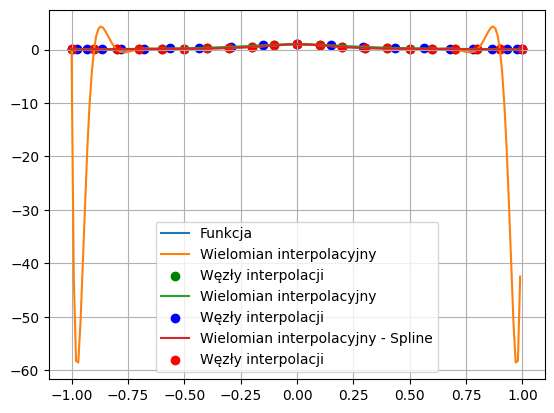

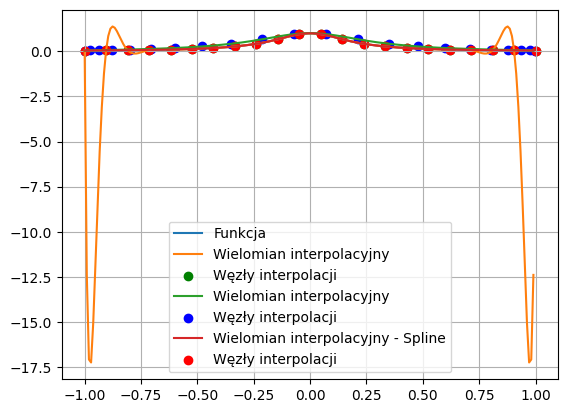

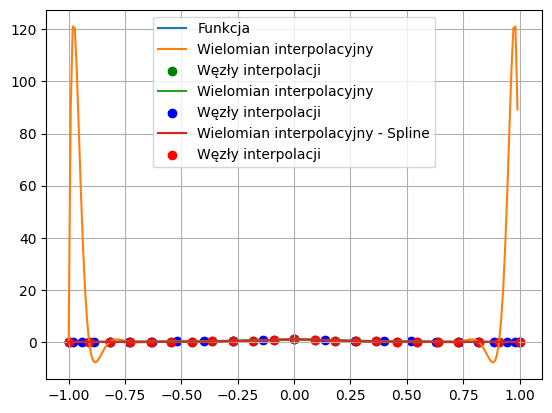

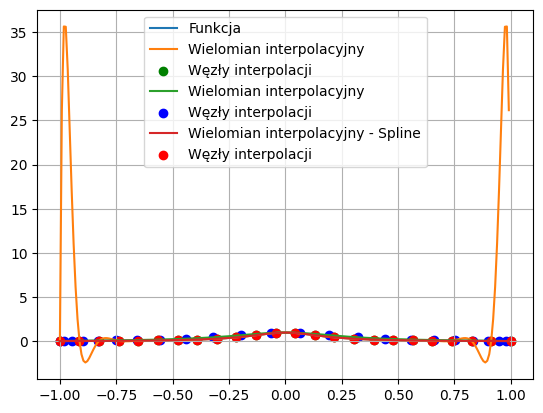

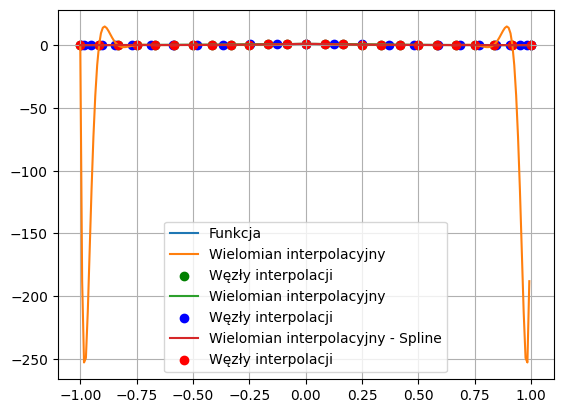

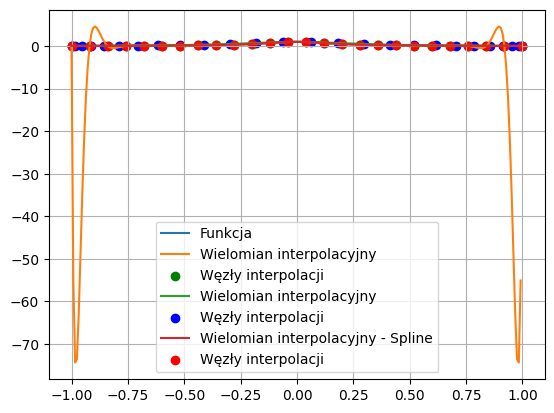

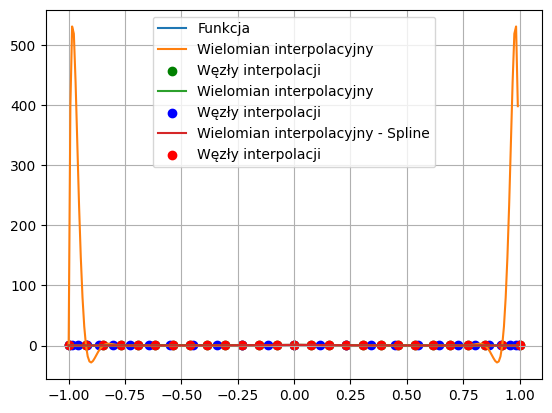

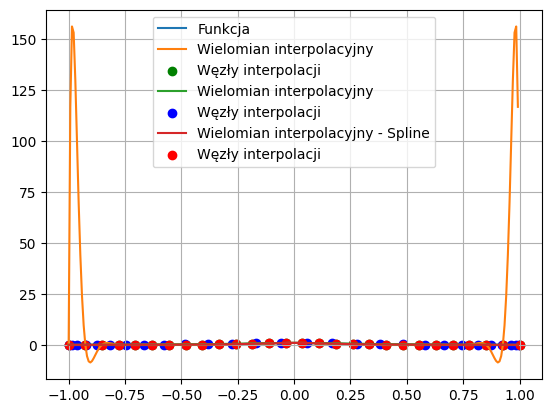

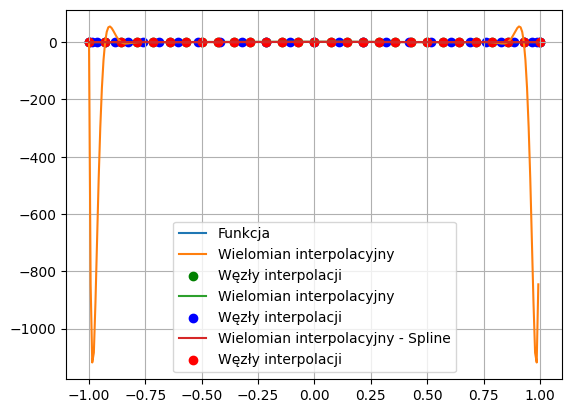

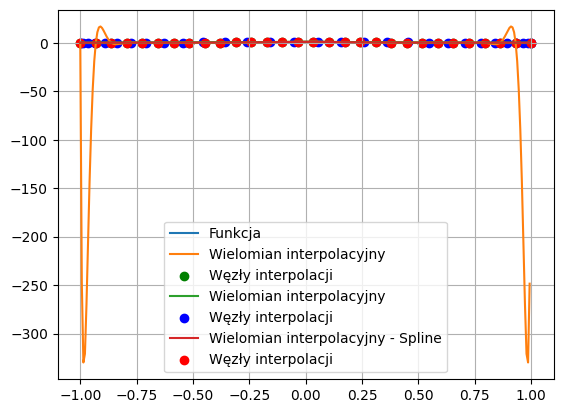

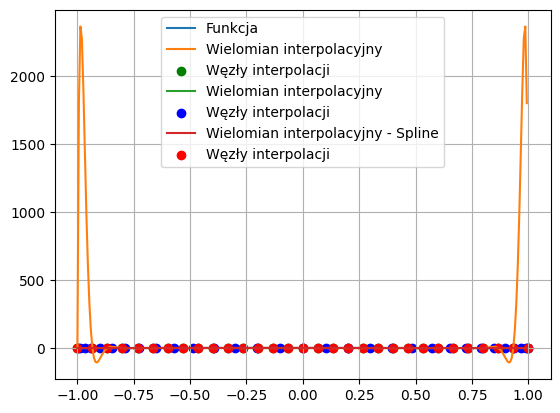

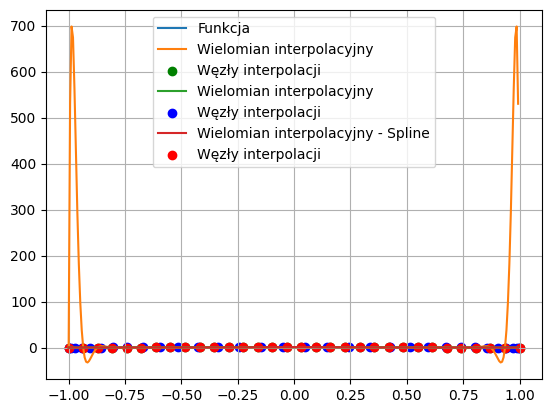

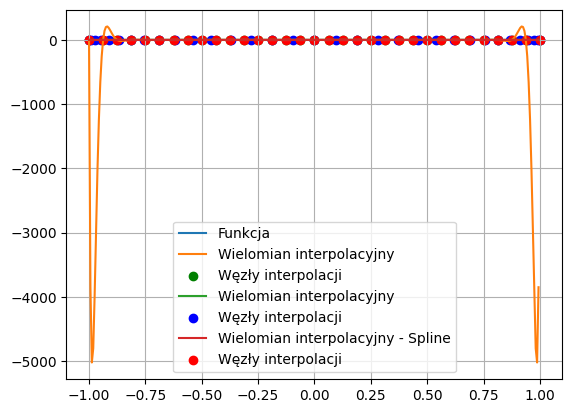

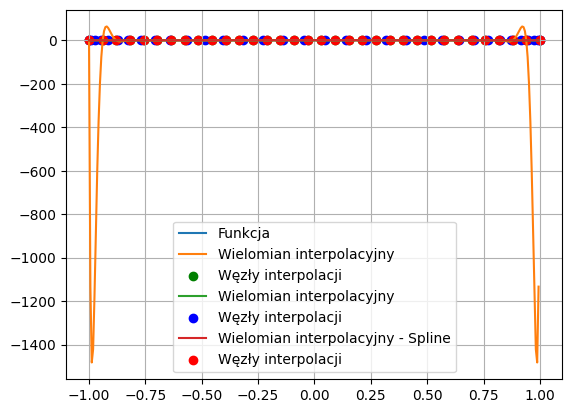

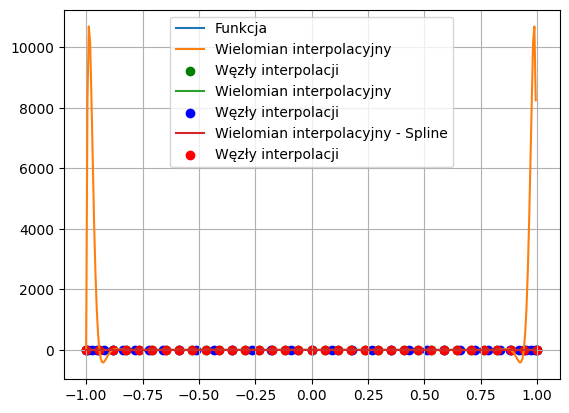

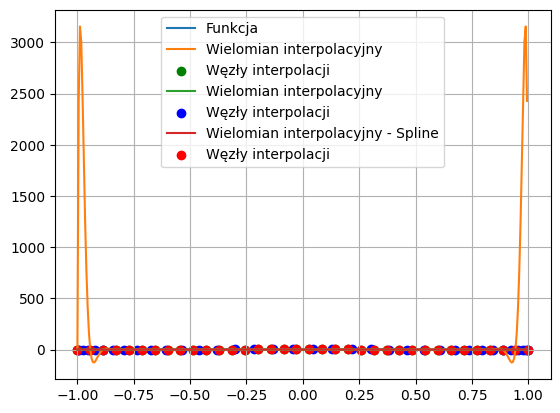

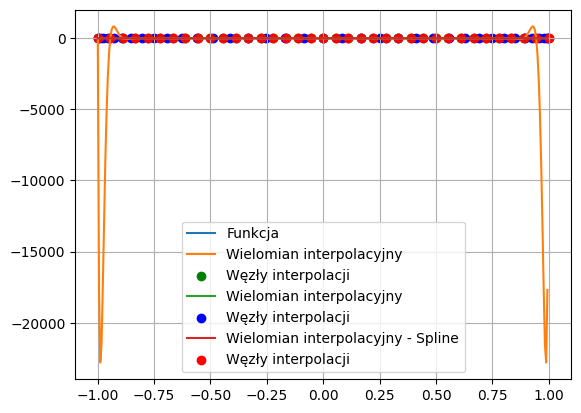

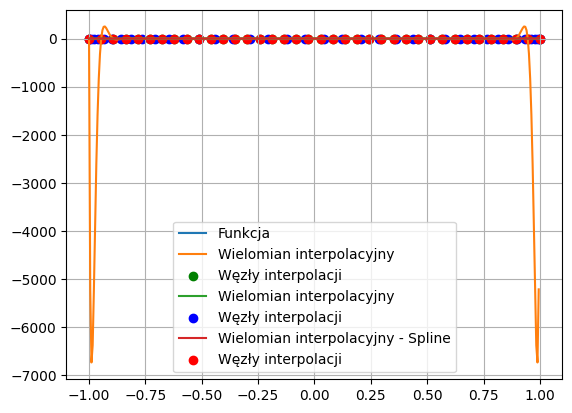

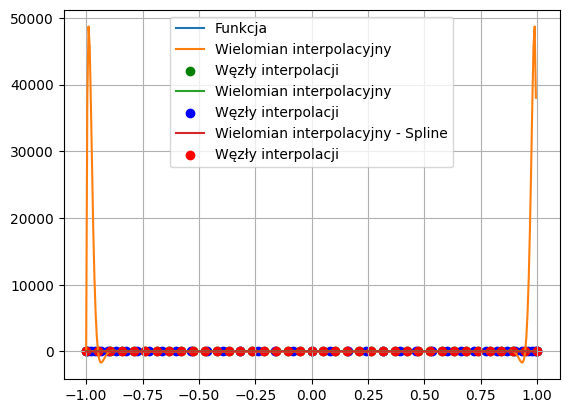

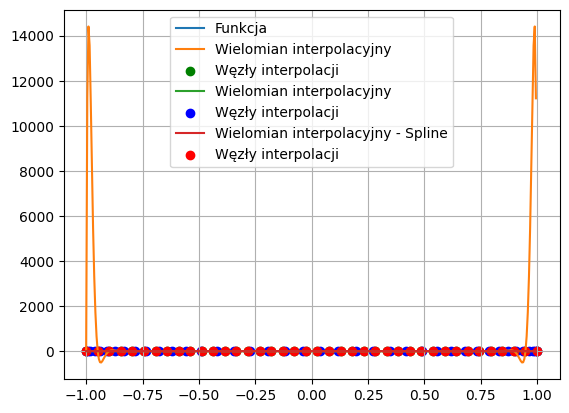

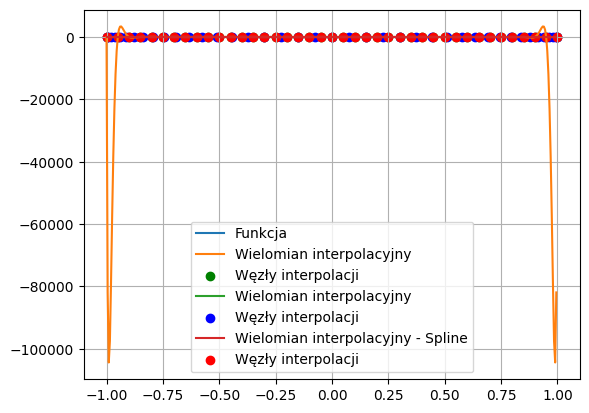

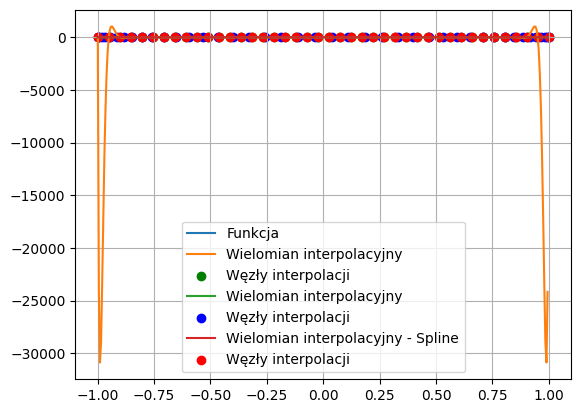

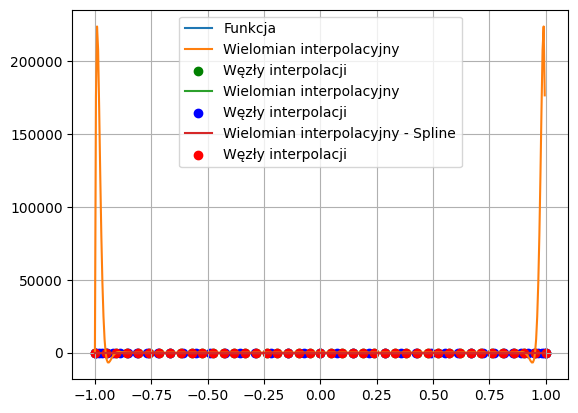

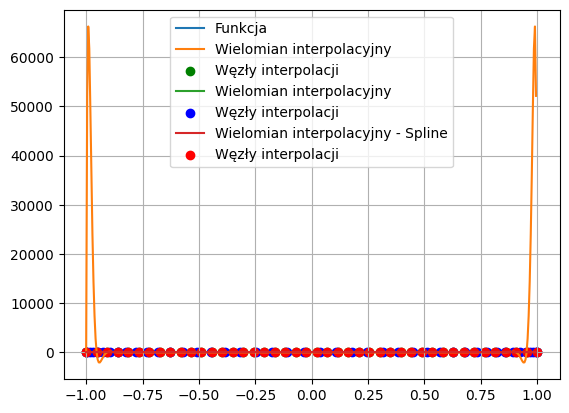

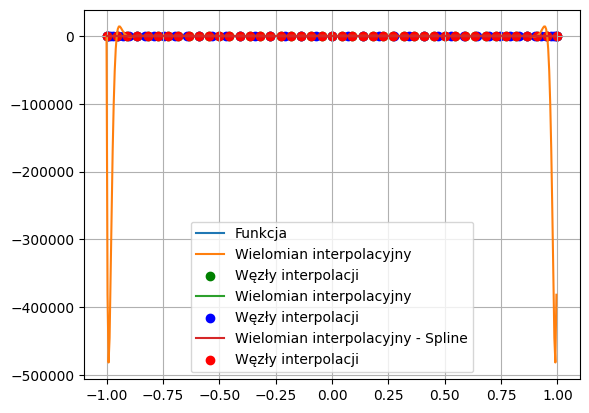

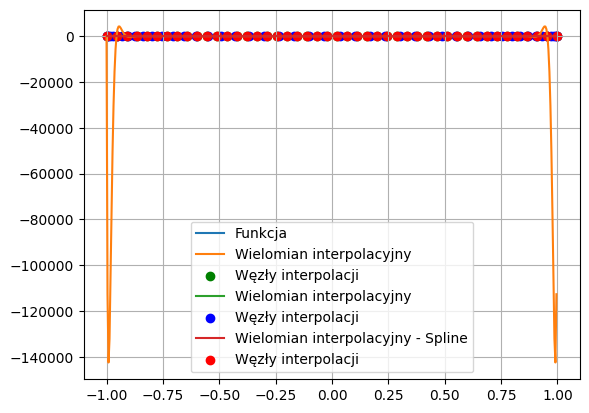

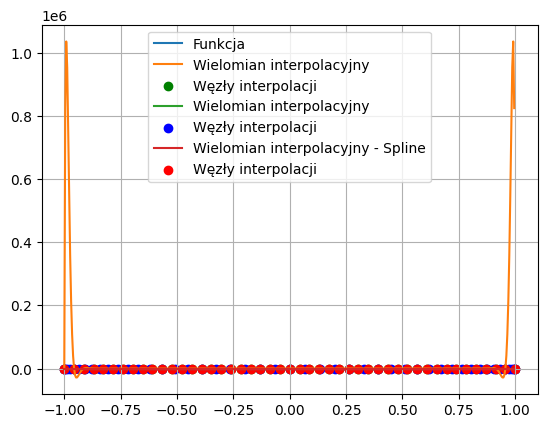

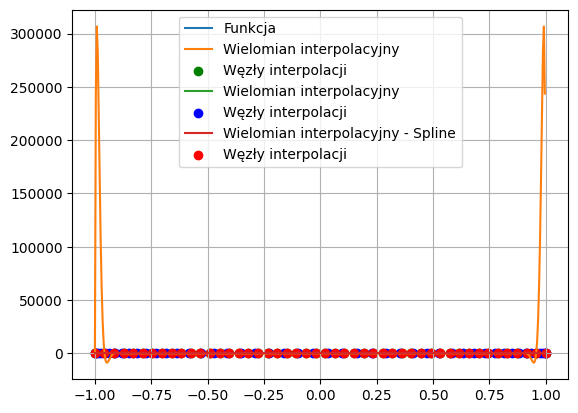

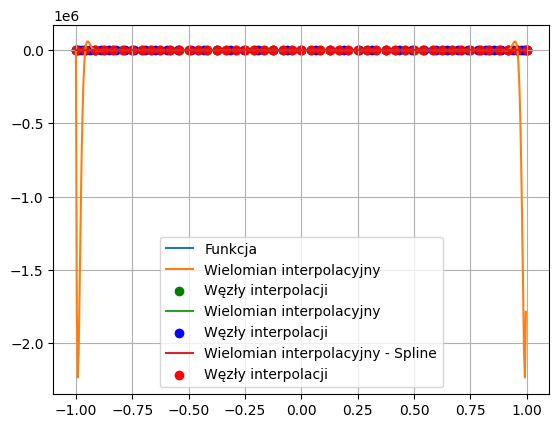

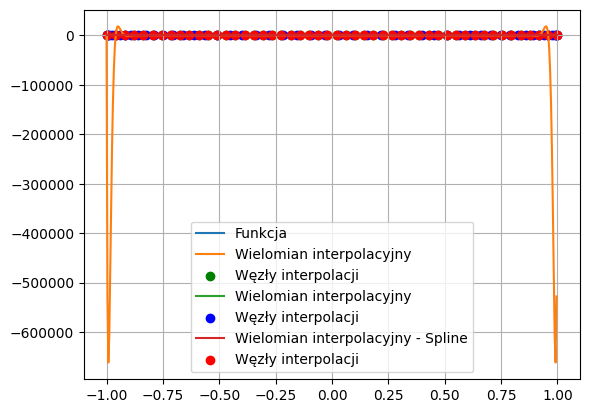

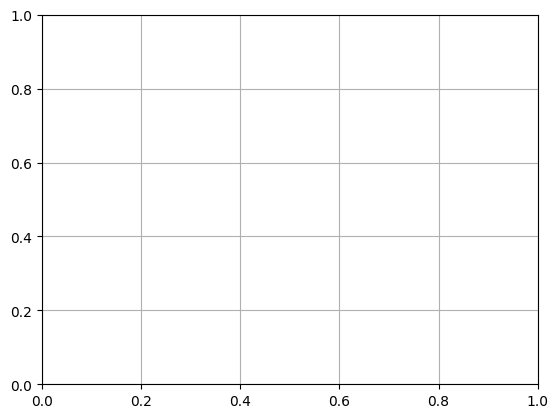

In [7]:
S = 4
T = 50
start_1 = -1
target_1 = 1

plt.figure(figsize=(10, 6))

for i in range(S, T):
    h1 = (target_1 - start_1)/i
    nodes1, nodes1C, y1_values = do_interpolation(f1, start_1, target_1, i)
    data1 = [start_1 + j*h1/10 for j in range(10*(i))]
    
    interp1 = [lagrange_interpolation(_, nodes1, y1_values) for _ in data1]

    data1C = [start_1 + (target_1-start_1) * (1 + m.cos((2*j + 1)*m.pi/(2*(i)))) / 2 for j in range(i)]
    
    interp1C = [lagrange_interpolation(_, nodes1C, y1_values) for _ in data1]

    data = [start_1 + j*h1/10 for j in range(10*(i))]

    spline1 = interp1d(nodes1, y1_values, kind='cubic')
    interp11S = spline1(data1)

    y1 = [f1(x) for x in data]
    
    plt.plot(data, y1, label='Funkcja')
    
    plt.plot(data1, interp1, label='Wielomian interpolacyjny')
    plt.scatter(nodes1, y1_values, color='green', label='Węzły interpolacji')
    
    plt.plot(data1, interp1C, label='Wielomian interpolacyjny')
    plt.scatter(nodes1C, y1_values, color='blue', label='Węzły interpolacji')

    plt.plot(data1, interp11S, label='Wielomian interpolacyjny - Spline')
    plt.scatter(nodes1, y1_values, color='red', label='Węzły interpolacji')


    plt.legend()
    plt.show()
    plt.grid(True)

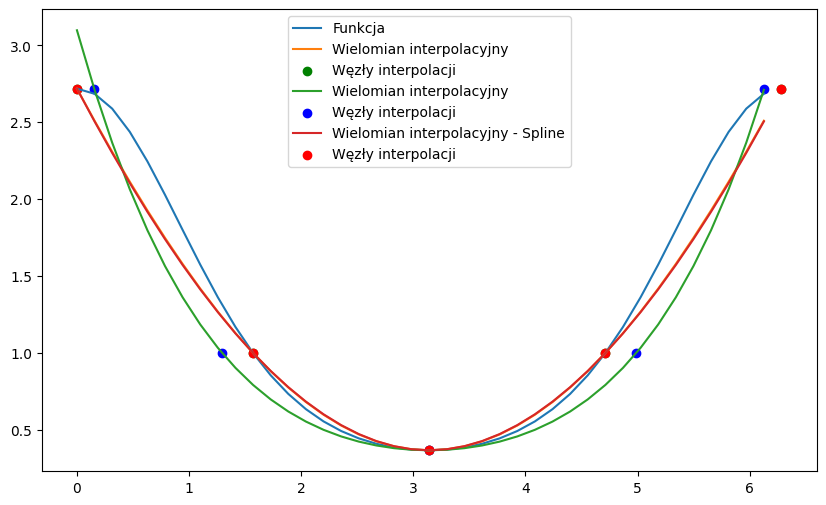

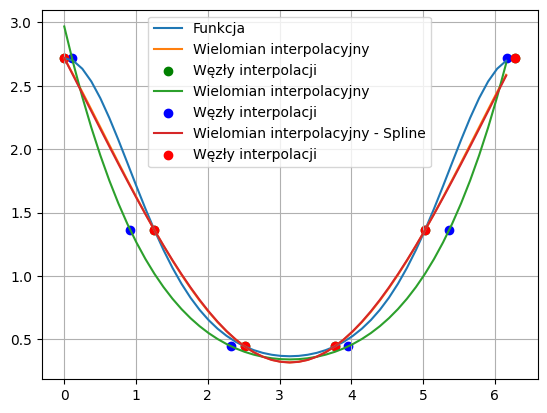

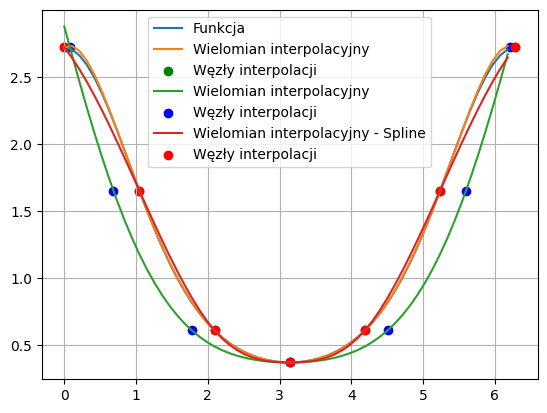

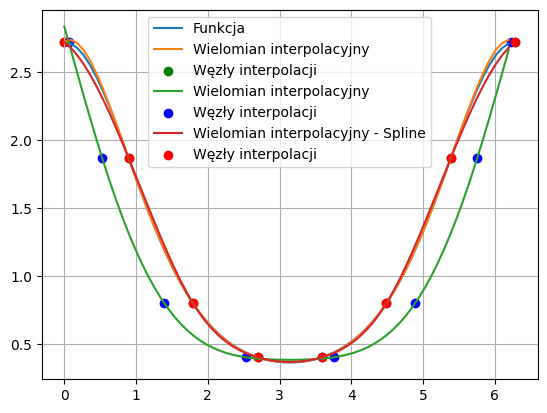

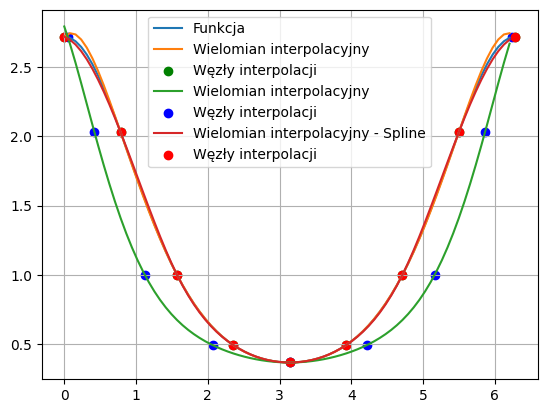

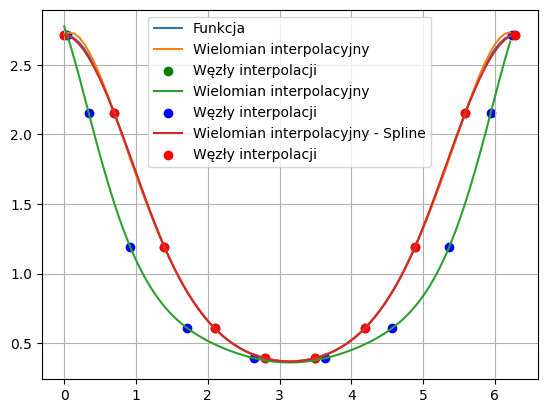

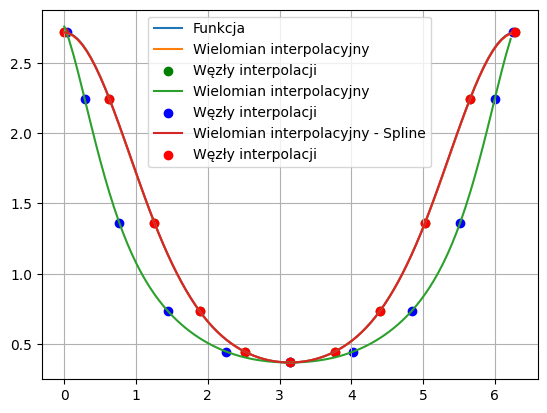

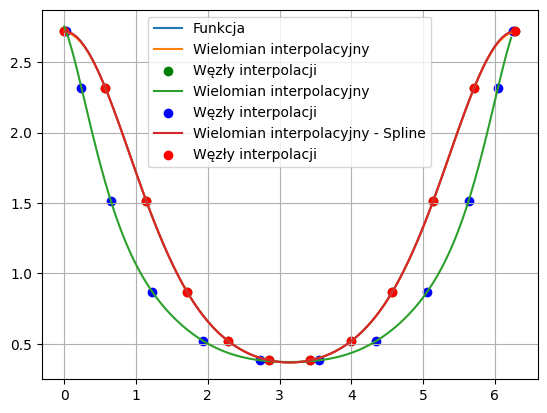

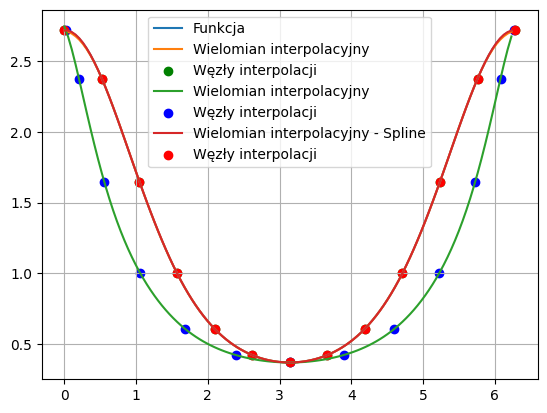

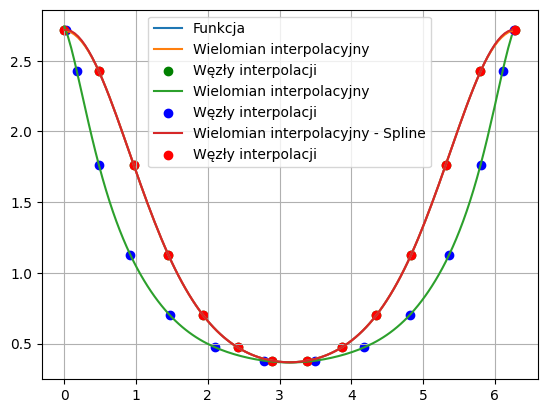

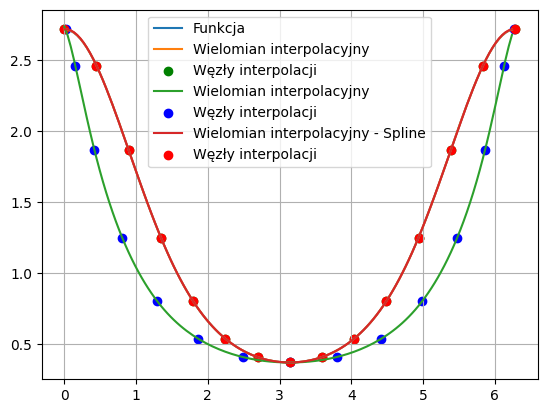

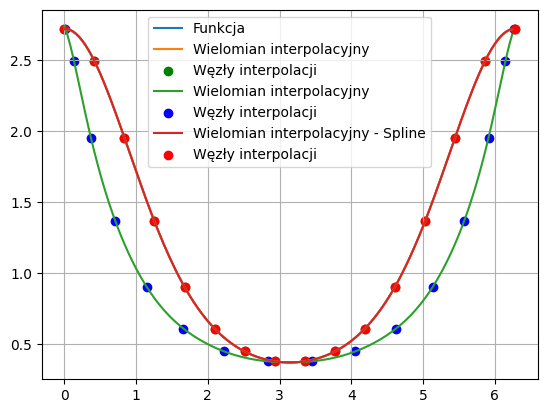

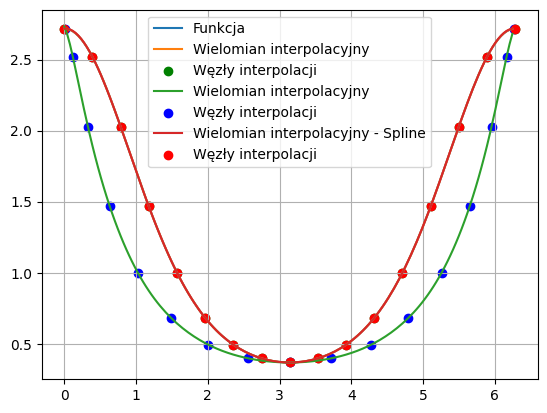

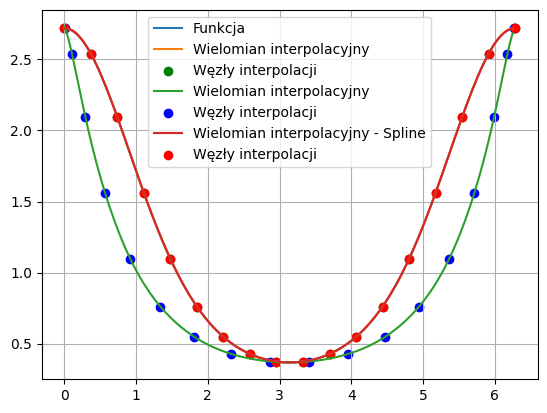

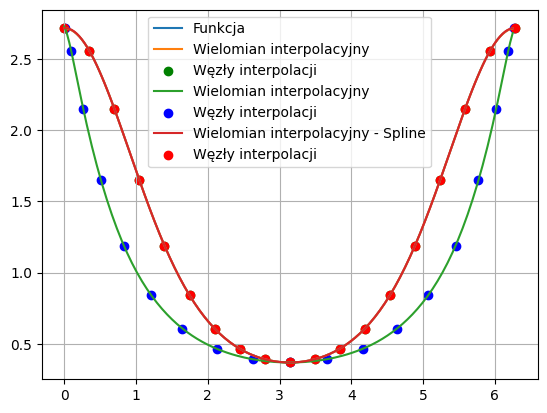

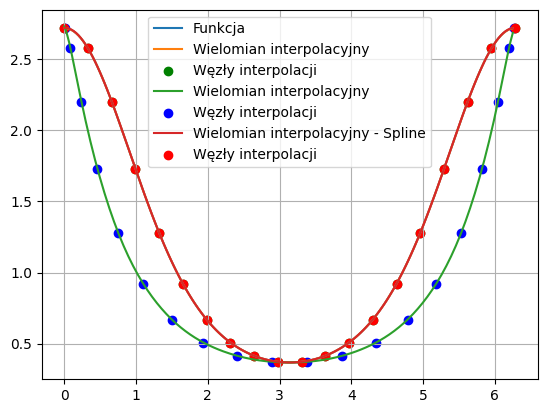

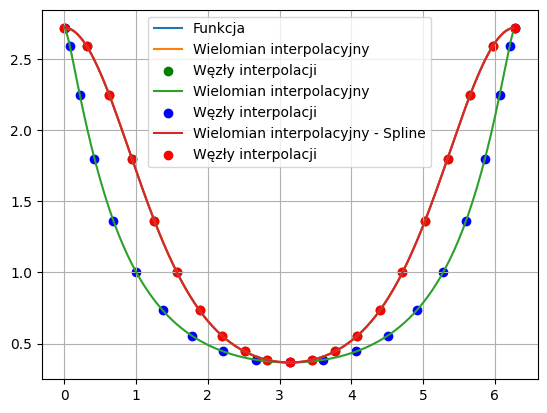

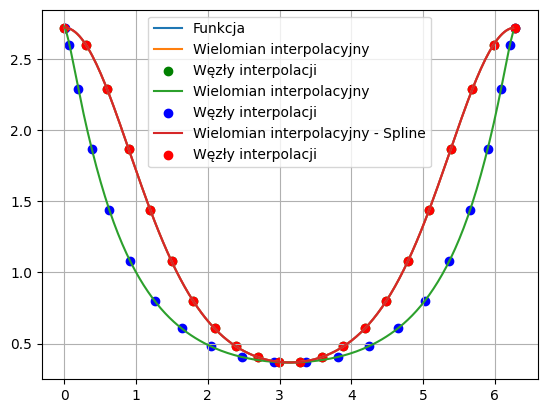

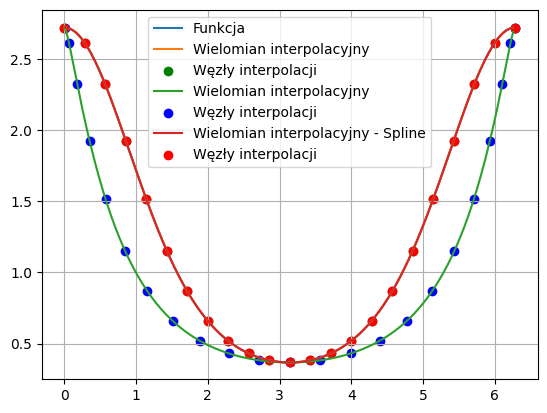

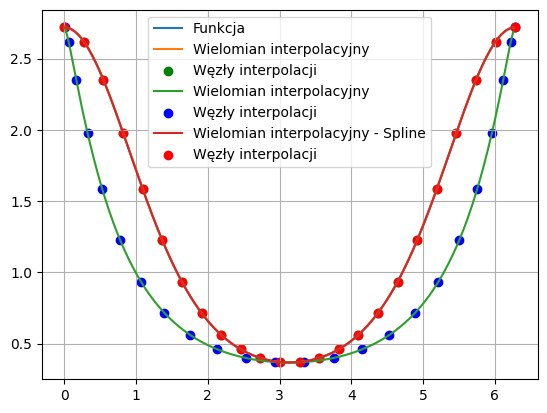

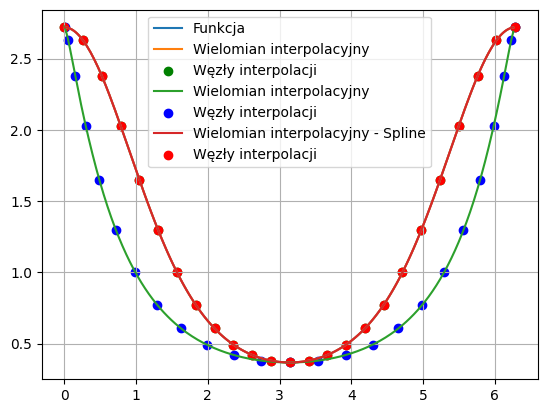

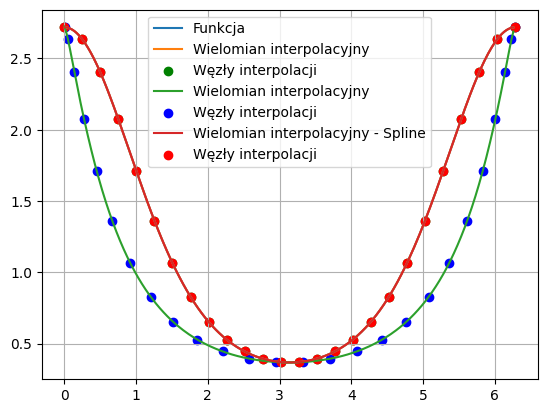

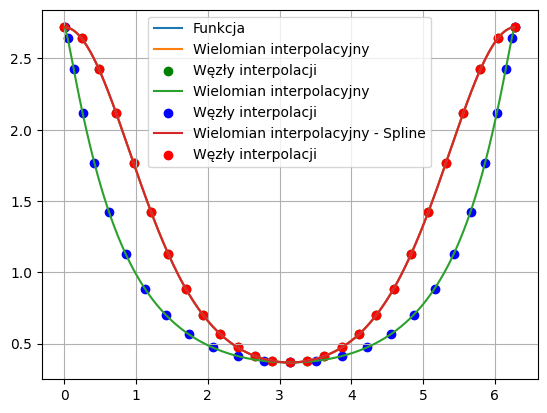

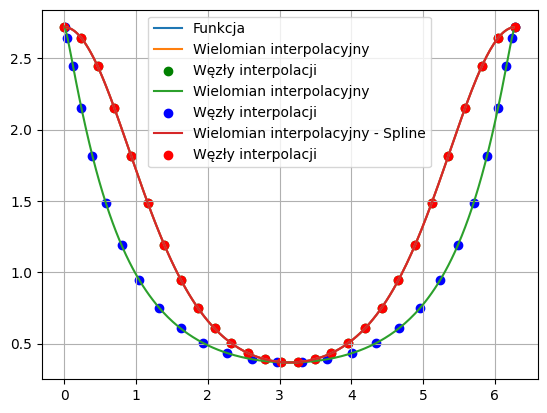

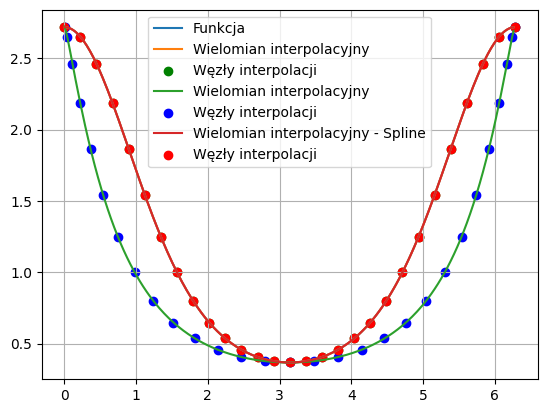

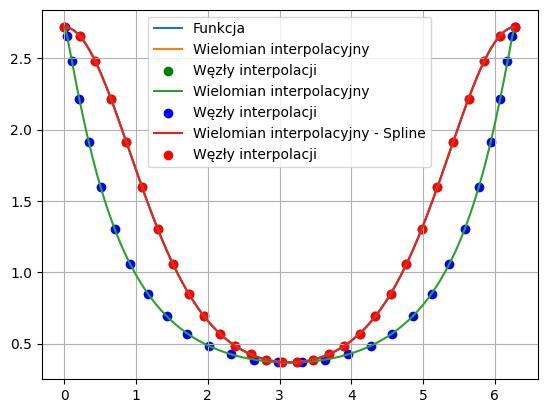

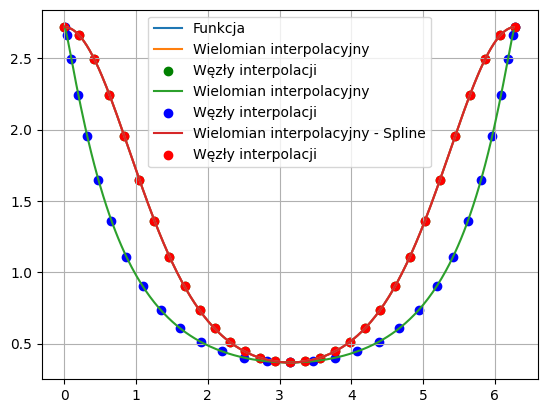

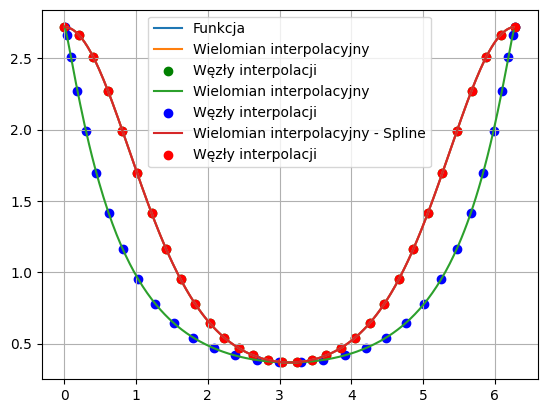

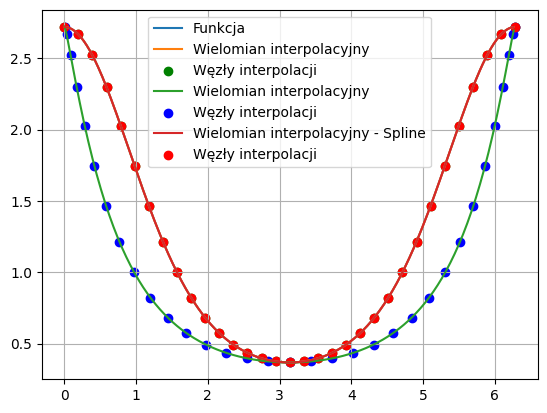

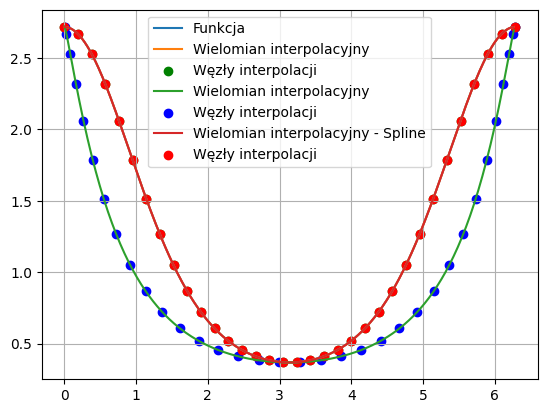

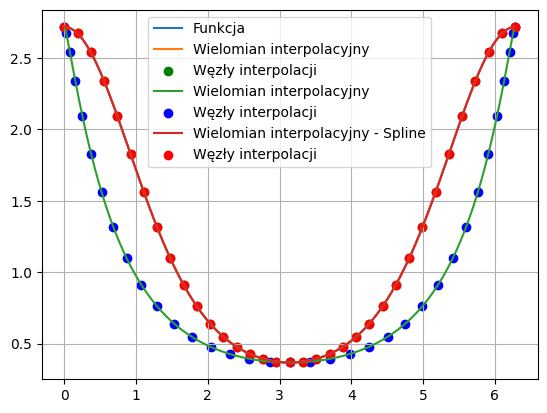

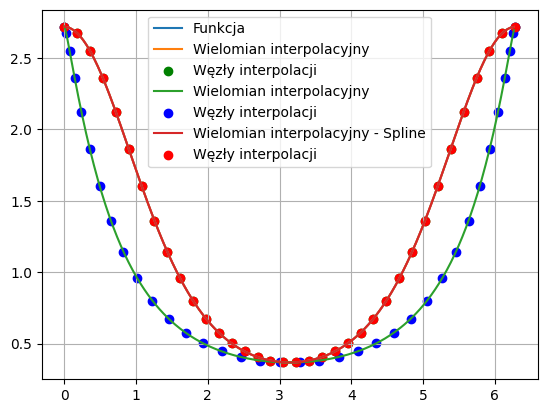

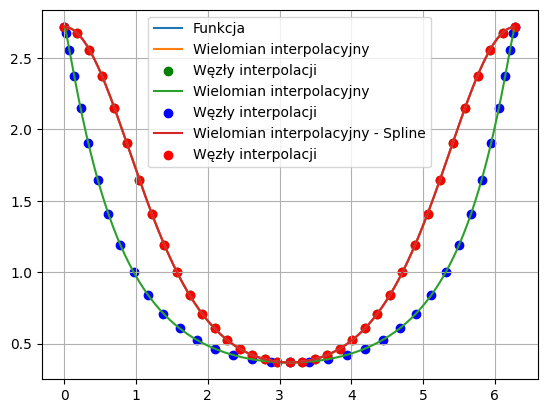

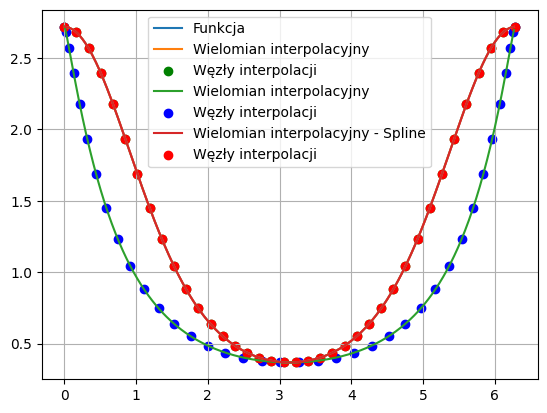

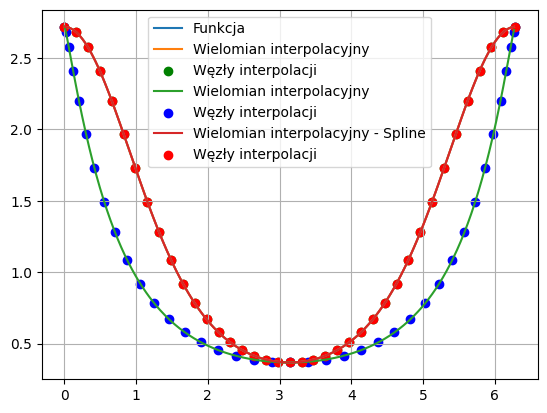

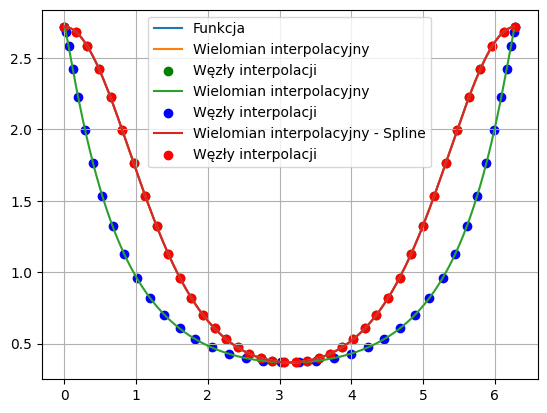

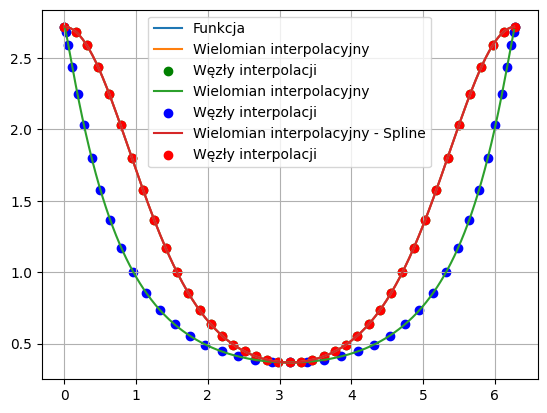

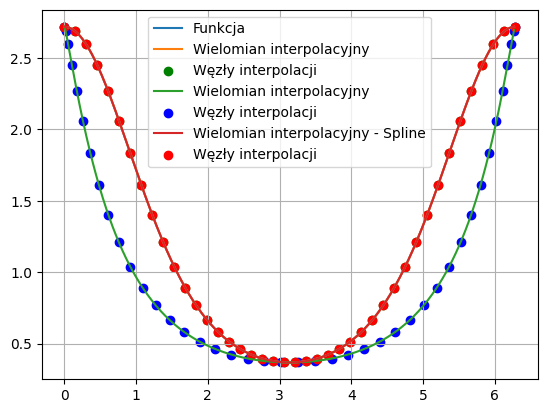

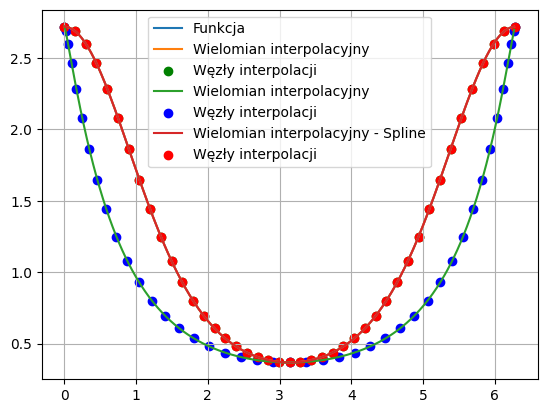

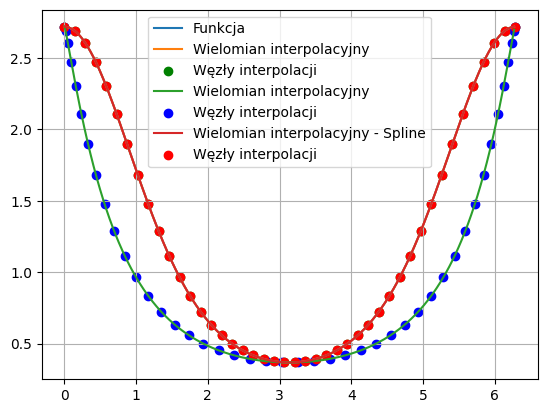

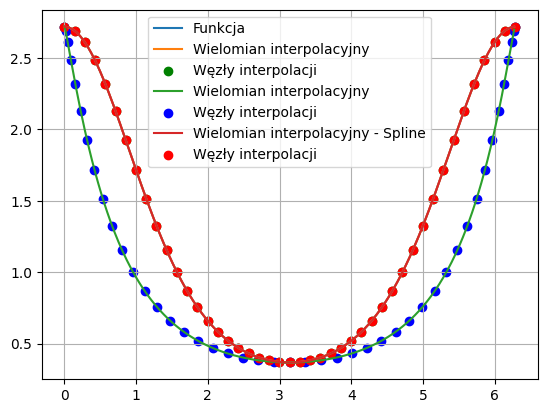

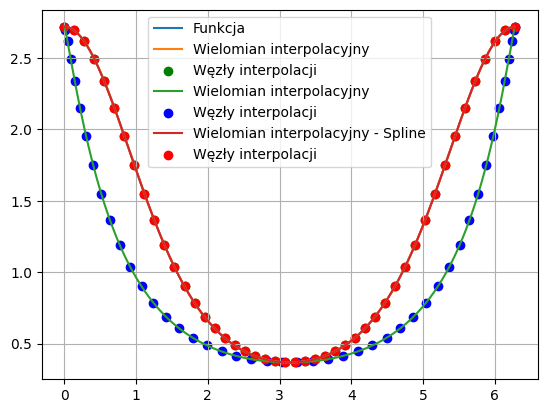

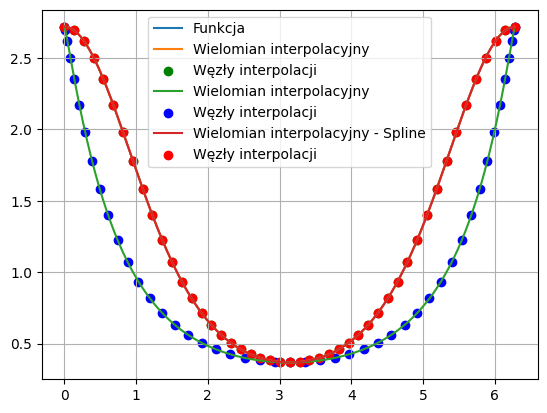

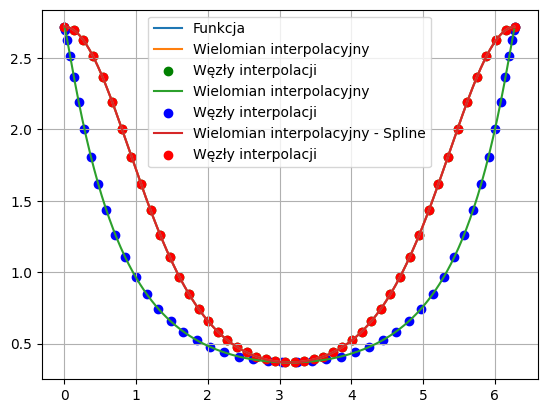

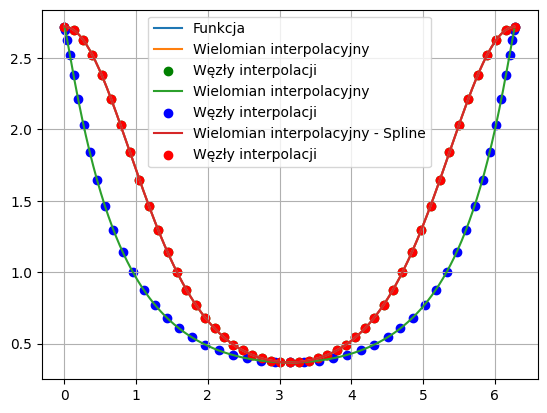

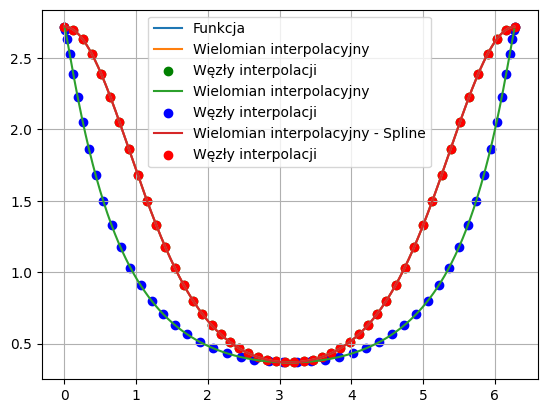

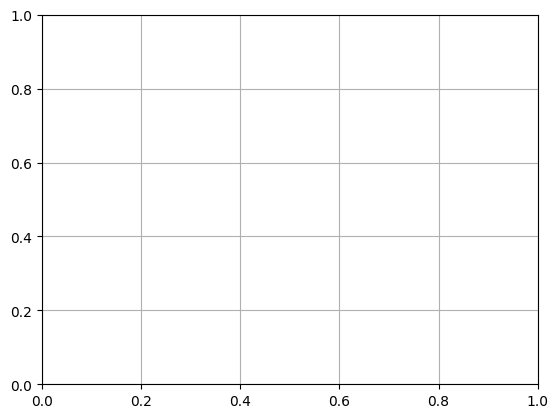

In [8]:
S = 4
T = 50
start_2 = 0
target_2 = 2*m.pi

plt.figure(figsize=(10, 6))

for i in range(S, T):
    h2 = (target_2 - start_2)/i
    nodes2, nodes2C, y2_values = do_interpolation(f2, start_2, target_2, i)
    data2 = [start_2 + j*h2/10 for j in range(10*(i))]
    
    interp2 = [lagrange_interpolation(_, nodes2, y2_values) for _ in data2]

    data2C = [start_2 + (target_2-start_2) * (1 + m.cos((2*j + 1)*m.pi/(2*(i)))) / 2 for j in range(i)]
    
    interp2C = [lagrange_interpolation(_, nodes2C, y2_values) for _ in data2]

    data = [start_2 + j*h2/10 for j in range(10*(i))]

    spline2 = interp1d(nodes2, y2_values, kind='cubic')
    interp2S = spline2(data2)

    y2 = [f2(x) for x in data]

    plt.plot(data, y2, label='Funkcja')
    
    plt.plot(data2, interp2, label='Wielomian interpolacyjny')
    plt.scatter(nodes2, y2_values, color='green', label='Węzły interpolacji')

    plt.plot(data2, interp2C, label='Wielomian interpolacyjny')
    plt.scatter(nodes2C, y2_values, color='blue', label='Węzły interpolacji')

    plt.plot(data2, interp2S, label='Wielomian interpolacyjny - Spline')
    plt.scatter(nodes2, y2_values, color='red', label='Węzły interpolacji')

    
    plt.legend()
    plt.show()
    plt.grid(True)

In [9]:
def interpolate_and_evaluate_lag(f, start, target, nodes, y_values, rand):
    error_norms = []
    for x_rand in rand:
        #x_rand = start + np.random.random() * (target - start)
        actual_value = f(x_rand)
        interpolated_value = lagrange_interpolation(x_rand, nodes, y_values)
        error_norms.append(abs(actual_value - interpolated_value))

    return norm(error_norms)

In [10]:
def interpolate_and_evaluate_lagC(f, start, target, nodes, y_values, rand):
    error_norms = []
    for x_rand in rand:
        #x_rand = start + np.random.random() * (target - start)
        #print(x_rand)
        x_rand = (x_rand - start) / 2 + start
        #print(x_rand)
        actual_value = f(x_rand)
        interpolated_value = lagrange_interpolation(x_rand, nodes, y_values)
        error_norms.append(abs(actual_value - interpolated_value))

    return norm(error_norms)

In [11]:
def interpolate_and_evaluate_spline(f, start, target, nodes, y_values, rand):
    spline = interp1d(nodes, y_values, kind='cubic')
    
    error_norms = []
    for x_rand in rand:
        #x_rand = start + np.random.random() * (target - start)
        actual_value = f(x_rand)
        interpolated_value = spline(x_rand)
        error_norms.append(actual_value - interpolated_value)
    
    return norm(error_norms)

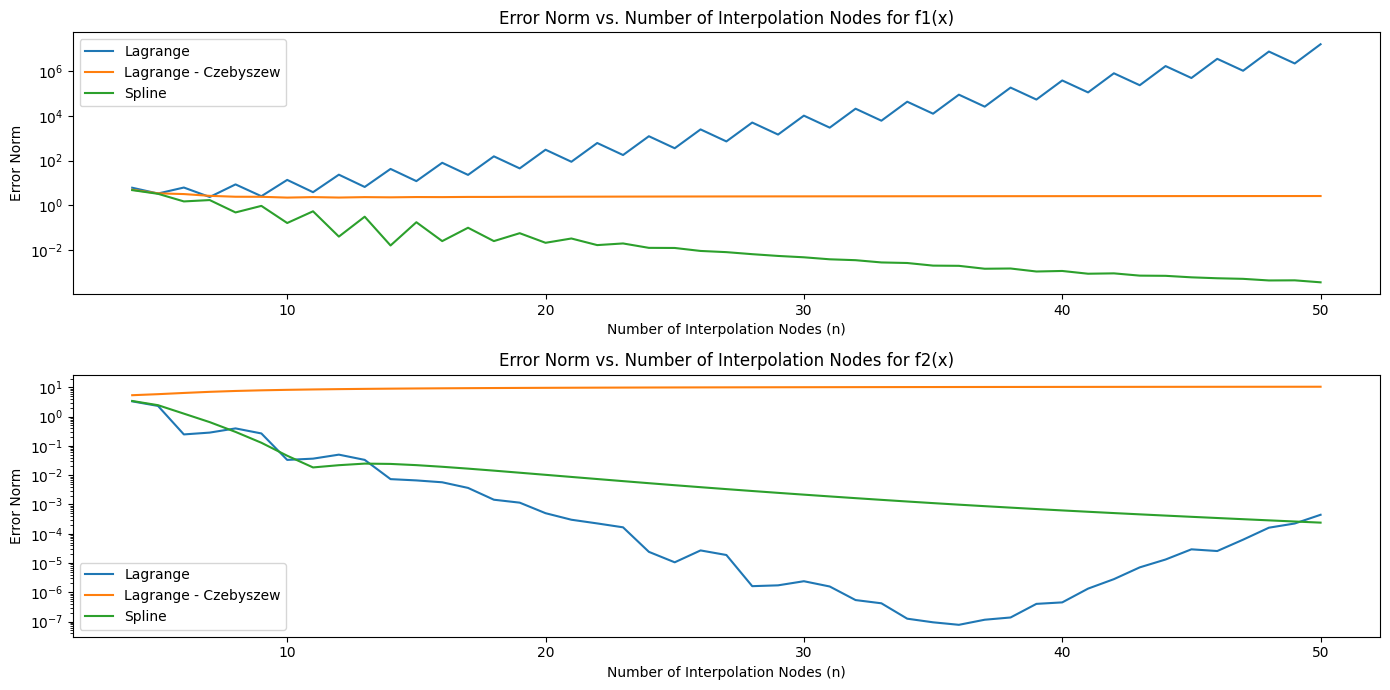

In [12]:
S = 4
T = 51
start_1 = -1
target_1 = 1
start_2 = 0
target_2 = 2*m.pi

methods = ['Lagrange', 'Lagrange - Czebyszew', 'Spline']

errors_f1 = {method: [] for method in methods}
errors_f2 = {method: [] for method in methods}

rand_1 = [start_1 + np.random.random() * (target_1 - start_1) for _ in range(500)] 
rand_2 = [start_2 + np.random.random() * (target_2 - start_2) for _ in range(500)] 


for i in range(S, T):
    nodes1, nodes1C, y1_values = do_interpolation(f1, start_1, target_1, i)
    nodes2, nodes2C, y2_values = do_interpolation(f2, start_2, target_2, i)
        
    errors_f1['Lagrange'].append(interpolate_and_evaluate_lag(f1, start_1, target_1, nodes1, y1_values, rand_1))
    errors_f1['Lagrange - Czebyszew'].append(interpolate_and_evaluate_lag(f1, start_1, target_1, nodes1C, y1_values, rand_1))
    errors_f1['Spline'].append(interpolate_and_evaluate_spline(f1, start_1, target_1, nodes1, y1_values, rand_1))
    
    errors_f2['Lagrange'].append(interpolate_and_evaluate_lag(f2, start_2, target_2, nodes2, y2_values, rand_2))
    errors_f2['Lagrange - Czebyszew'].append(interpolate_and_evaluate_lag(f2, start_2, target_2, nodes2C, y2_values, rand_2))
    errors_f2['Spline'].append(interpolate_and_evaluate_spline(f2, start_2, target_2, nodes2, y2_values, rand_2))

n_values = range(S, T)

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
for method in methods:
    plt.plot(n_values, errors_f1[method], label=method)
plt.xlabel('Number of Interpolation Nodes (n)')
plt.ylabel('Error Norm')
plt.title('Error Norm vs. Number of Interpolation Nodes for f1(x)')
plt.yscale('log')
plt.legend()

plt.subplot(2, 1, 2)
for method in methods:
    plt.plot(n_values, errors_f2[method], label=method)
plt.xlabel('Number of Interpolation Nodes (n)')
plt.ylabel('Error Norm')
plt.title('Error Norm vs. Number of Interpolation Nodes for f2(x)')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()